# Analysis - exp15-18

- Exploring different heuristics with the stumbler-strategist (15-17)
- Examine an the effect of perfect strategist on a naive stumbler (18)

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

# Find the files
## Exp 14 - used for comparison

In [6]:
path = "/Users/type/Code/azad/data/wythoff/exp14/"

exp_14 = []
runs = range(2, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [7]:
pprint(exp_14[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


## Exp15

In [8]:
path = "/Users/type/Code/azad/data/wythoff/exp15/"

exp_15 = []
runs = range(2, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_15.append(mon)

## Exp 16

In [9]:
path = "/Users/type/Code/azad/data/wythoff/exp16/"

exp_16 = []
runs = range(2, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_16.append(mon)

## Exp 17

In [10]:
path = "/Users/type/Code/azad/data/wythoff/exp17/"

exp_17 = []
runs = range(2, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_17.append(mon)

## Exp 18

In [11]:
path = "/Users/type/Code/azad/data/wythoff/exp18/"

exp_18 = []
runs = range(2, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_18.append(mon)

# Plots

## Variations on V(s) projection

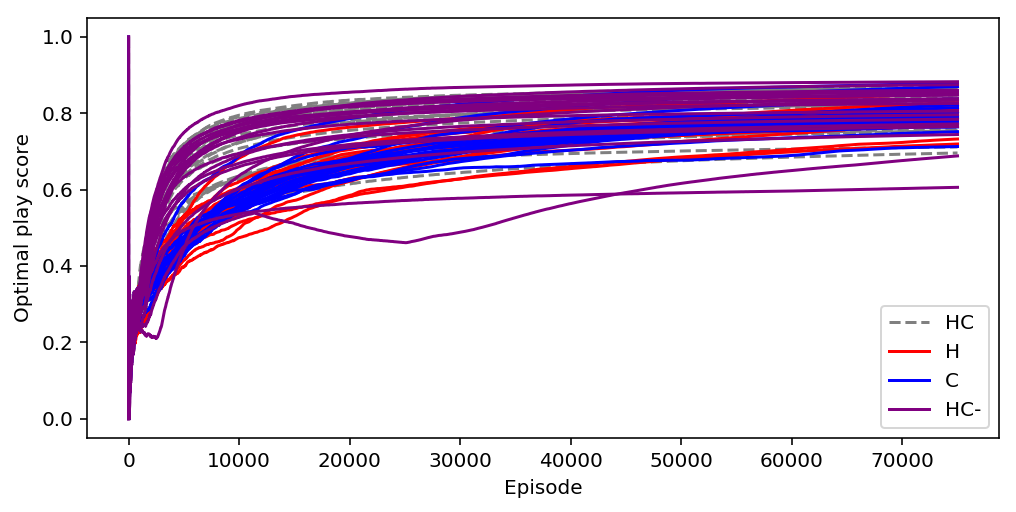

In [12]:
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "HC"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    linestyle="--", color='grey', alpha=1, label=lab)

for n, mon in enumerate(exp_15):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "H"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=1, label=lab)


for n, mon in enumerate(exp_16):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "C"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='blue', alpha=1, label=lab)


for n, mon in enumerate(exp_17):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "HC-"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='purple', alpha=1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

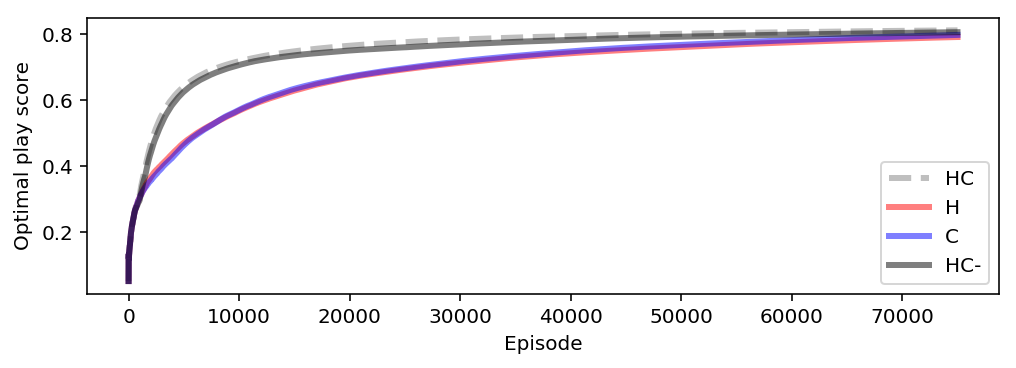

In [19]:
# Avg runs
episode_14, exp_14_avg_score = score_summary(exp_14)
episode_15, exp_15_avg_score = score_summary(exp_15)
episode_16, exp_16_avg_score = score_summary(exp_16)
episode_17, exp_17_avg_score = score_summary(exp_17)

plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_14, exp_14_avg_score, linestyle="--", color='grey', alpha=.5, linewidth=3, label="HC")
_ = plt.plot(episode_15, exp_15_avg_score, color='red', alpha=.5, linewidth=3, label="H")
_ = plt.plot(episode_16, exp_16_avg_score, color='blue', alpha=.5, linewidth=3, label="C")
_ = plt.plot(episode_17, exp_17_avg_score, color='black', alpha=.5, linewidth=3, label="HC-")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

## Perfect strategy

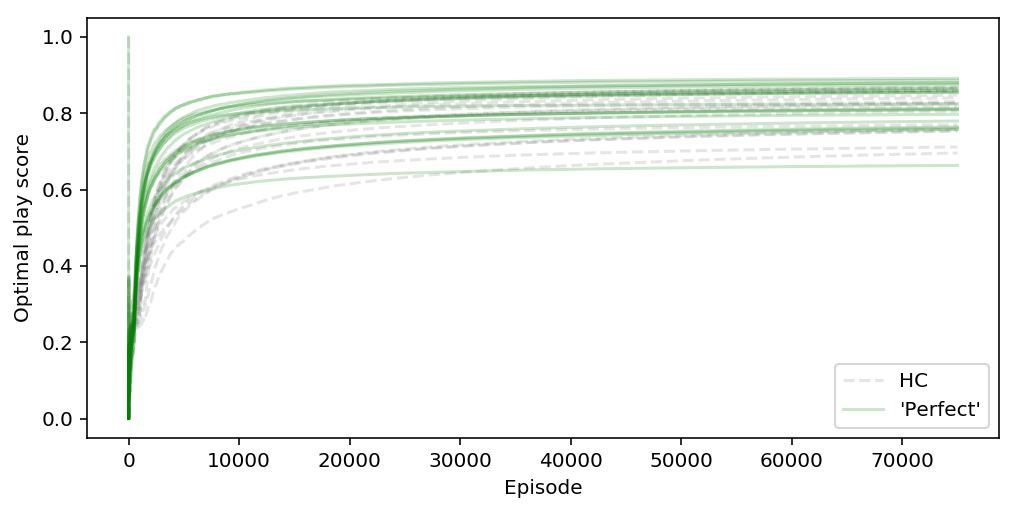

In [14]:
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "HC"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    linestyle="--", color='grey', alpha=.2, label=lab)

for n, mon in enumerate(exp_18):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "'Perfect'"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='green', alpha=.2, label=lab)
  
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [15]:
episode_18, exp_18_avg_score = score_summary(exp_18)

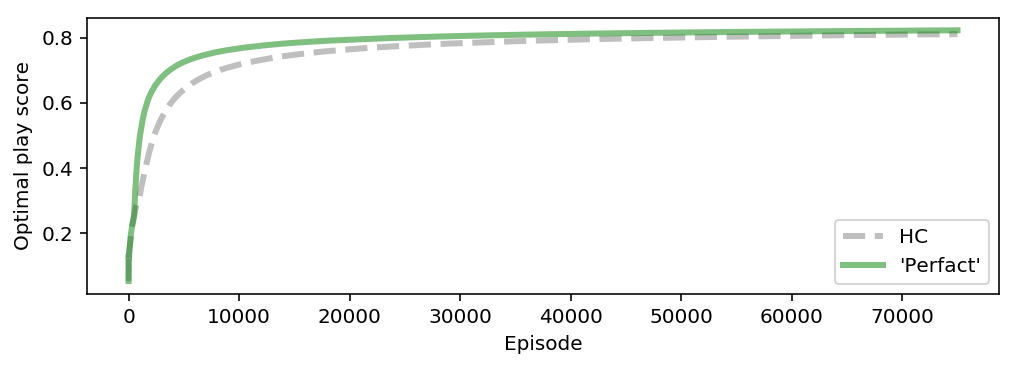

In [17]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(mon['episode'], exp_14_avg_score, linestyle="--", color='grey', alpha=.5, linewidth=3, label="HC")
_ = plt.plot(episode_18, exp_18_avg_score, color='green', alpha=.5, linewidth=3, label="'Perfact'")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")